# Quant Static Tests

In [1]:
import sys, os
sys.path.append(os.path.abspath('..'))
from helpers import *


from Quant_Static import StaticQuantClassifier as SQC
from aeon.datasets import load_gunpoint
from aeon.datasets import load_basic_motions

In [2]:
# Load Data
#Xtrain, ytrain = load_gunpoint(split="TRAIN")
Xtrain, ytrain = load_basic_motions(split="TRAIN")

#Xtest, ytest = load_gunpoint(split="TEST")
Xtest, ytest = load_basic_motions(split="TEST")

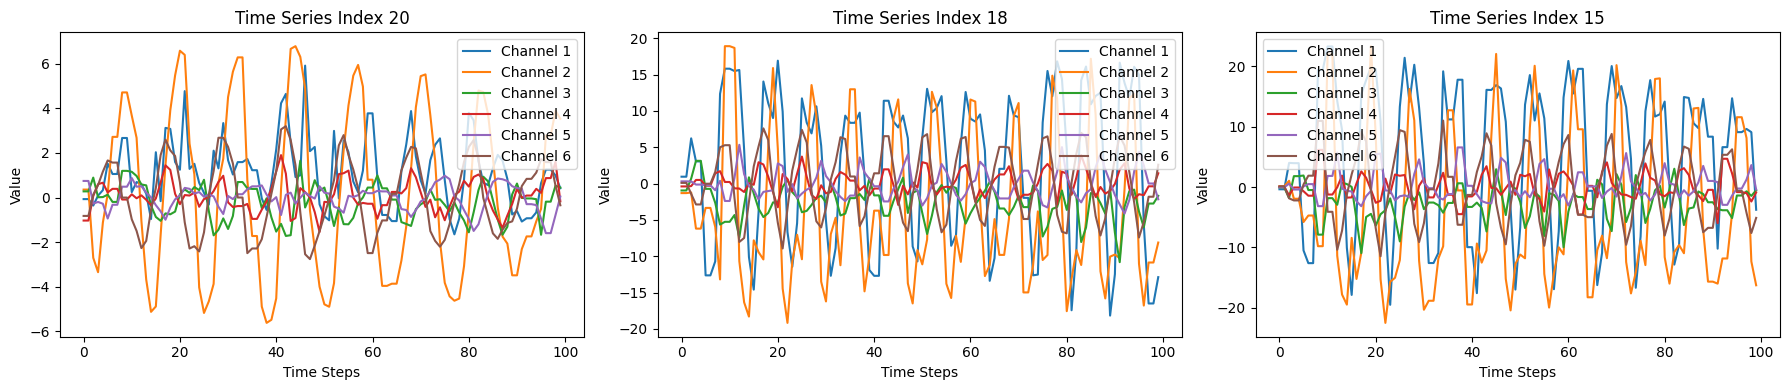

In [3]:
from helpers import *
plot_random_time_series(Xtrain, None, 3)

In [4]:
#Generate random static variables to test algorithm
Xstatic = np.random.rand(Xtrain.shape[0], 45)
Xstatic_test = np.random.rand(Xtest.shape[0], 45)

#To test if None works
Xstatic = None
Xstatic_test = None

In [5]:
sqc = SQC(random_state=42)
sqc.fit(Xtrain, ytrain, static = Xstatic)

In [6]:
sqc.predict(Xtest, static = Xstatic_test)

array(['standing', 'standing', 'standing', 'standing', 'standing',
       'standing', 'standing', 'standing', 'standing', 'standing',
       'running', 'running', 'running', 'running', 'running', 'running',
       'running', 'running', 'running', 'running', 'walking', 'walking',
       'walking', 'walking', 'walking', 'walking', 'walking', 'walking',
       'walking', 'walking', 'badminton', 'badminton', 'badminton',
       'badminton', 'badminton', 'badminton', 'badminton', 'badminton',
       'badminton', 'badminton'], dtype='<U9')

In [7]:
static_prox = sqc.predict_proximities(Xtest, static = Xstatic_test)
print(static_prox.shape)
static_prox

(40, 200)


array([[5, 3, 6, ..., 2, 5, 3],
       [5, 3, 6, ..., 2, 5, 2],
       [5, 3, 6, ..., 2, 5, 2],
       ...,
       [3, 5, 2, ..., 5, 2, 5],
       [3, 5, 2, ..., 5, 2, 5],
       [3, 5, 2, ..., 5, 2, 5]])

## Veiw the proximities

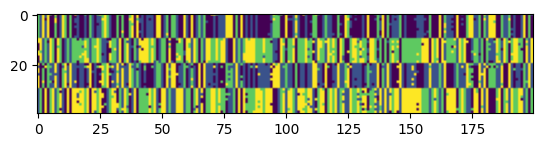

In [8]:
import matplotlib.pyplot as plt
plt.imshow(sqc.predict_proximities(Xtest, static = Xstatic_test))

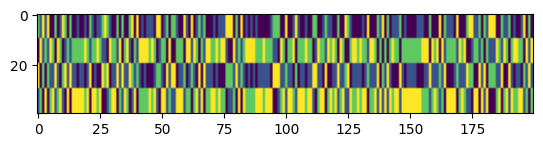

In [10]:
plt.imshow(sqc.proximities)

# Not Static

In [11]:
sqc = SQC(random_state=42)
sqc.fit(Xtrain, ytrain, static = None)
prox = sqc.predict_proximities(Xtest, static = None)
print(prox.shape)
prox

(40, 200)


array([[5, 3, 6, ..., 2, 5, 3],
       [5, 3, 6, ..., 2, 5, 2],
       [5, 3, 6, ..., 2, 5, 2],
       ...,
       [3, 5, 2, ..., 5, 2, 5],
       [3, 5, 2, ..., 5, 2, 5],
       [3, 5, 2, ..., 5, 2, 5]])

In [12]:
print(prox.shape)
print(static_prox.shape)
prox == static_prox

(40, 200)
(40, 200)


array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])